# Predicting of house prices
#### Predict housing prices using machine learing algorithm and perform EDA on the data set .

### Context

To Explore more on Regression Algorithm

### Content

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

**Data Set Information**

**Features**

|Feature|Description|
|-----|-----|
|CRIM|per capita crime rate by town|
|ZN|proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|proportion of non-retail business acres per town|
|CHAS|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX|nitric oxides concentration (parts per 10 million)|
|RM|average number of rooms per dwelling|
|AGE|proportion of owner-occupied units built prior to 1940|
|DIS|weighted distances to ﬁve Boston employment centers|
|RAD|index of accessibility to radial highways|
|TAX|full-value property-tax rate per 10,000 dollars|
|PTRATIO|pupil-teacher ratio by town |
|B|1000(Bk−0.63)2 where Bk is the proportion of blacks by town| 
|LSTAT|% lower status of the population|
|MEDV|Median value of owner-occupied homes in 1000s dollars|

We can see that the input attributes have a mixture of units.

## Importing necessary libraries
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing data modelling libraries


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn import svm

In [3]:
# Assigning the name of the column in the form of 'list'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Importing the dataset in the variable 'df' and assigning the column names as specified above
df= pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Viewing the top 5 values of the dataset
df.head()

# in order to view bottom 5 entries, we can do
#df.tail()

#in order to view more than 5 entries, we can enter any integer value into '()'.
#Ex: df.head(10) or df.tail(15), etc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Now let us check for the shape of the dataset and also that are any null values present in our dataset.
# For that,

print('shape of the dataset=', df.shape)

print(' \nThe null count of each column of the dataset are as follows:')
df.isnull().sum()

shape of the dataset= (506, 14)
 
The null count of each column of the dataset are as follows:


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Here, we can observe that there are 506 rows and 14 columns in the dataset. Also, that there are no null values present in the dataset.

In [5]:
# Function to identify numeric features:

def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(df)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)




# Function to identify categorical features:

def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

print("===="*20)



# Function to check the datatypes of all the columns:

def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(df)

Numerical Features:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Categorical Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Datatypes of all the columns:


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Detect outliers in the continuous columns

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond **(third quartile + 1.5xIQR)** and below **(first quartile - 1.5xIQR)**. 

- The function below takes a dataframe and outputs the number of outliers in every numeric feature based on the above rule of *IQR* 

You can even modify the function below to capture the outliers as per their other definitions.

In [6]:
# Function to detect outliers in every feature
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


#### Observations :
- As per the IQR methodology, there are outliers in majority of the columns.
- In the further steps below, we will see how to deal with the outliers.

## EDA & Data Visualizations

Exploratory data analysis is an approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to unravel various insights that later become important in developing a robust algorithmic model. 

### Univariate analysis

- Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.
- Let's construct two functions, one that plots a histogram of all the continuous features and other that plots a boxplot of the same.

Histograms



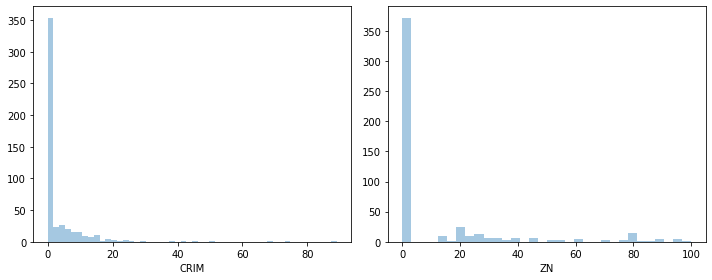

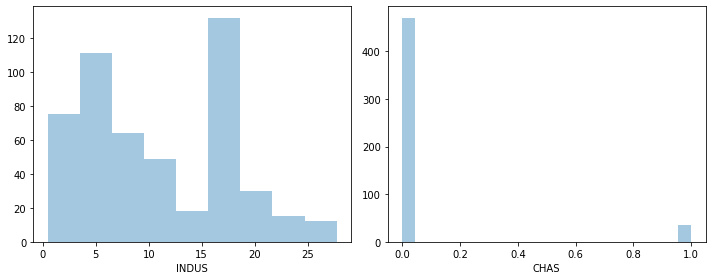

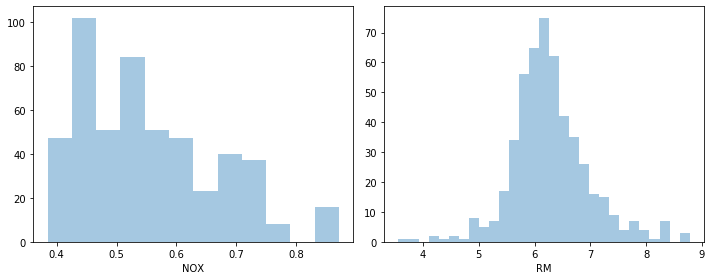

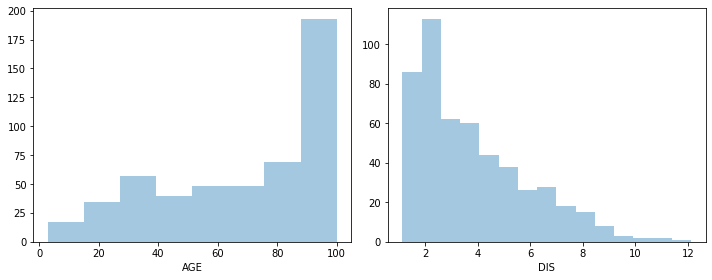

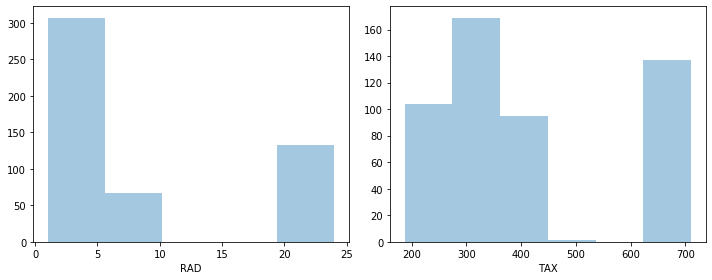

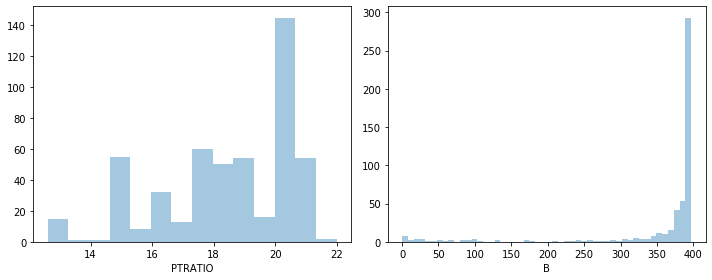

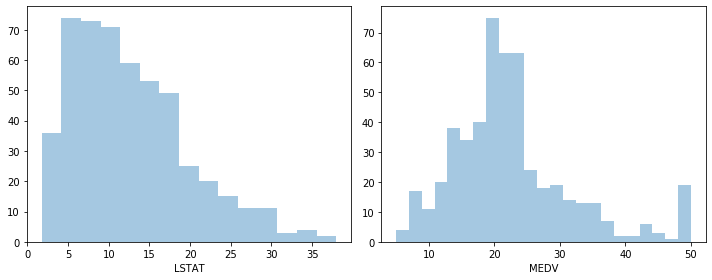


Box Plots



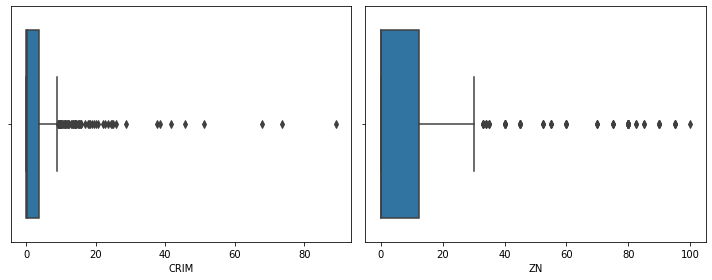

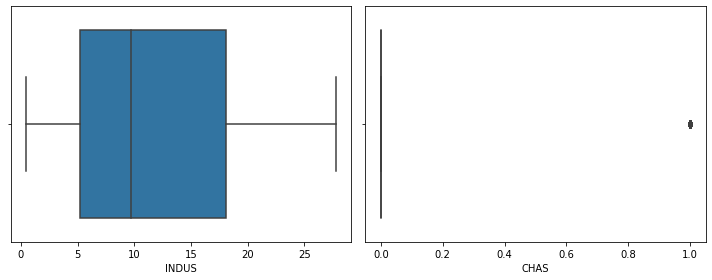

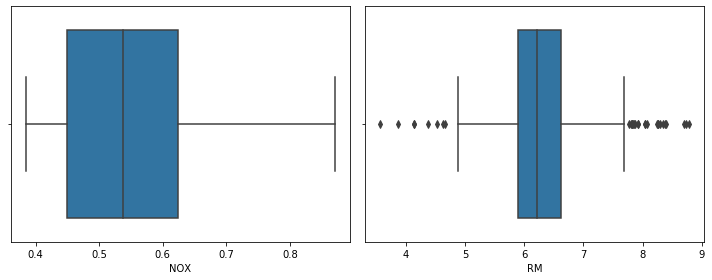

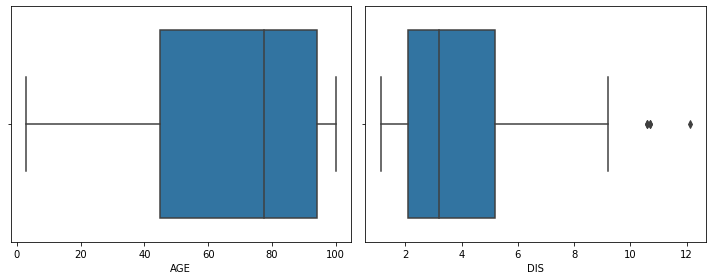

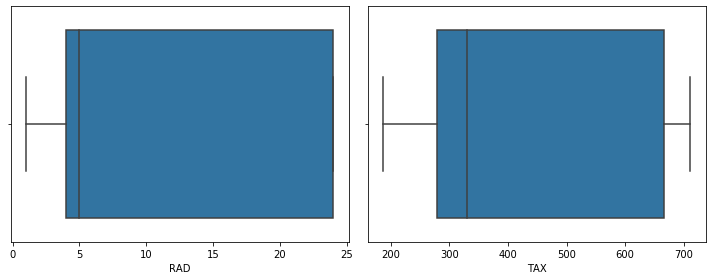

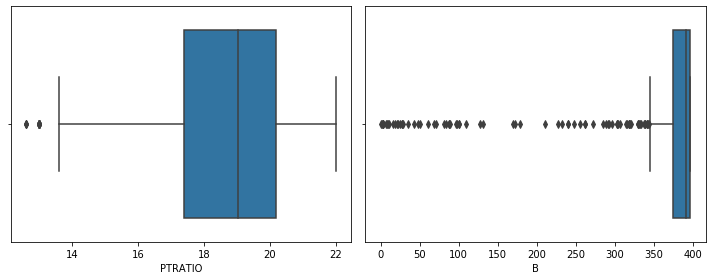

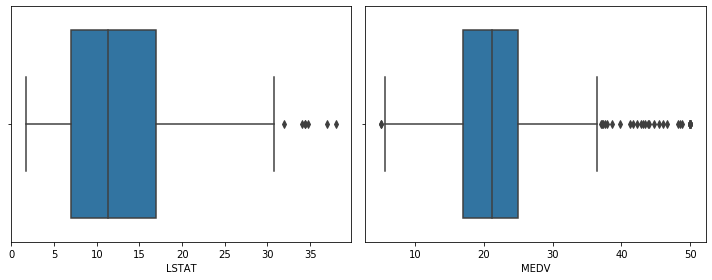

In [7]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

    
    
print("Histograms\n")
plot_continuous_columns(df)  

print("===="*30)
print('\nBox Plots\n')
plot_box_plots(df)

#### Observations:

- The columns `CRIM`,`ZN`,`B` and `MEDV` are heavily skewed. This is due to the presence of the **Outliers** present in our dataset. We will deal with outliers in the upcoming steps.
- We can see that the values in the column `CHAS` are almost 0. This means that Charles River dummy variables are all 0, which in turn means that tract does not bound rivers.
- Since the features `CHAS` consist majorly only of a single value, it's variance is quite less and hence we can drop it since technically will be of no help in prediction.

In [8]:
df.drop(['CHAS'],axis=1,inplace=True)

# Axis=1 means that the execution happens column wise. This means that column will be removed.
# Inplace=True means that the change is permanent.
# If we di inplace= false, then only in this parocular step, the column will be removed and in further steps, it will be back.

# Again viewing the dataset to see the change.
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Treating outliers in the continuous columns

- Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
- To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
- To reduce left skewness, we take squares or cubes or higher powers.
- But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
- Hence for this data we use a method called **Winsorization**. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots. Do read up on it more [here](https://www.statisticshowto.datasciencecentral.com/winsorize/)

Lets' write a function below that treats all the outliers in the numeric features using winsorization.

In [9]:
from scipy.stats.mstats import winsorize

# Function to treat outliers 

def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)

# Checking for outliers after applying winsorization
# We see this using a fuction called 'detect_outliers', defined above.

detect_outliers(df)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,NOX,0
4,RM,0
5,AGE,0
6,DIS,0
7,RAD,0
8,TAX,0
9,PTRATIO,0


We can see that the outliers are removed. The outliers, shown above, in columns `CRIM`,`ZN` and `B` are actually not outliers. They are the majority values present in out dataset.

## Prediction of house Price

In [10]:
# Predictors
x = df.iloc[:,:-1]

# This means that we are using all the columns, except 'MEDV', to predict the house price


# Target
y = df.iloc[:,-1]

# This is because MEDV is the 'Median value of owner-occupied homes in $1000s'.
# This shows that this is what we need to predict. So we call it the target variable.

#### Feature Selection using Random Forest

`Random Forests` are often used for feature selection in a data science workflow. This is because the tree based strategies that random forests use, rank the features based on how well they improve the purity of the node. The nodes having a very low impurity get split at the start of the tree while the nodes having a very high impurity get split towards the end of the tree. Hence by pruning the tree after desired amount of splits, we can create a subset of the most important features.

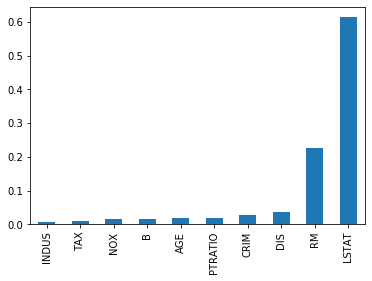

In [11]:
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42)
    rfc = RandomForestRegressor(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(10)
    rfc_importances.plot(kind='bar')
    plt.show()

rfc_feature_selection(x,y)

#### Observation:

- We can see that the Important features are sorted in ascending order, along with their importance in the form of bar graph.
- We can clearly observe that `LSTAT`, `RM`, `DIS` and `CRIM` are the most important features that can be used for prediction. 
- This means that we can ignore the other columns for the House price prediction.

In [12]:
x.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02763,18.0,2.31,0.538,6.575,65.2,4.0900,2,296.0,15.3,396.9,4.98
1,0.02763,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


In [13]:
# Modifying the Predictors to improve the effeciency of the model.

x= x[['CRIM','DIS','RM','LSTAT']]
x.head(2)

,CRIM,DIS,RM,LSTAT
0,0.02763,4.0900,6.575,4.98
1,0.02763,4.9671,6.421,9.14


#### Scaling the feature variables using `MinMaxScaler`

In [14]:
mms= MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

x.head()

,CRIM,DIS,RM,LSTAT
0,0.000000,0.490733,0.686656,0.066013
1,0.000000,0.654441,0.603458,0.280557
2,0.000000,0.654441,1.000000,0.017019
3,0.000439,0.858839,0.915181,0.000000
4,0.003833,0.858839,0.995678,0.084064


In [15]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

### 1. Linear Regression

In [16]:
lr=LinearRegression()

lr.fit(xtrain, ytrain)

coefficients=pd.DataFrame([xtrain.columns, lr.coef_]).T
coefficients=coefficients.rename(columns={0:'Attributes',1:'Coefficients'})
coefficients

,Attributes,Coefficients
0,CRIM,-3.87752
1,DIS,-2.6488
2,RM,7.64016
3,LSTAT,-13.8107


In [17]:
y_pred=lr.predict(xtrain)

#### Model Evaluation
- Training data

In [18]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

R^2:  0.7642226556723264
Adusted R^2:  0.761520336539631
MAE:  2.749607486874801
MSE:  12.146464209933594
RMSE:  3.4851777874211227


In [19]:
print(metrics.max_error(ytrain, y_pred))

13.607512374416215


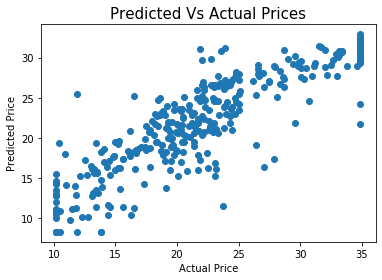

In [20]:
# visualizing the difference between the actual and predicted price 

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

- Test data

In [21]:
# Predicting the Test data with model 
ytest_pred=lr.predict(xtest)

lin_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",lin_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

R^2:  0.6997582362305643
Adusted R^2:  0.6915883923184709
MAE:  2.952910495701909
MSE:  13.29444955360989
RMSE:  3.646155448360628


In [22]:
print(metrics.max_error(ytest, ytest_pred))

12.579386511503582


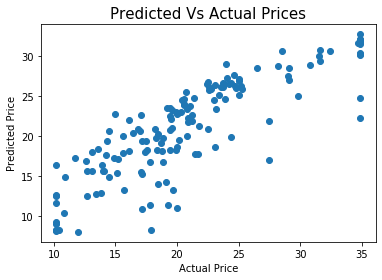

In [23]:
# visualizing the difference between the actual and predicted price 

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

### 2. Random Forest

In [24]:
rfr= RandomForestRegressor()

rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [25]:
y_pred=rfr.predict(xtrain)

#### Model Evaluation
- Training data

In [26]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

print("\nMaximum Error: ",metrics.max_error(ytrain, y_pred))

R^2:  0.9769726747519637
Adusted R^2:  0.9767087512534188
MAE:  0.7714414249435422
MSE:  1.186291171330935
RMSE:  1.089169946028137

Maximum Error:  4.841000000000051


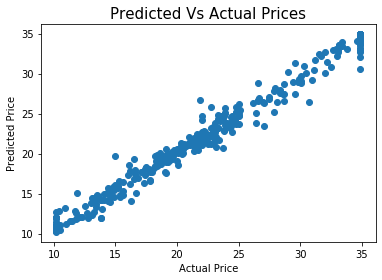

In [27]:
# visualizing the difference between the actual and predicted price 

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

- Test data

In [28]:
# Predicting the Test data with model 
ytest_pred=rfr.predict(xtest)

rfr_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",rfr_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

print("\nMaximum Error: ",metrics.max_error(ytest, ytest_pred))

R^2:  0.8035342826481577
Adusted R^2:  0.7981882767338219
MAE:  1.9771489051701214
MSE:  8.699334614732686
RMSE:  2.9494634452274004

Maximum Error:  14.572999999999993


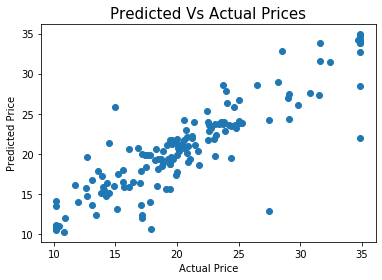

In [29]:
# visualizing the difference between the actual and predicted price 

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

### 3. Support Vector Machine (SVM)

In [30]:
svm_reg=svm.SVR()
svm_reg.fit(xtrain, ytrain)

SVR()

In [31]:
y_pred=svm_reg.predict(xtrain)

#### Model Evaluation
- Training data

In [32]:
print("R^2: ",metrics.r2_score(ytrain, y_pred))
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytrain, y_pred))
print("MSE: ", metrics.mean_squared_error(ytrain, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

print("\nMaximum Error: ",metrics.max_error(ytrain, y_pred))

R^2:  0.8309969913608581
Adusted R^2:  0.8290599941271717
MAE:  2.1579841631330376
MSE:  8.706472632729088
RMSE:  2.950673250756357

Maximum Error:  12.779908114045895


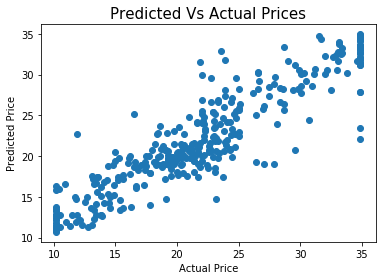

In [33]:
# visualizing the difference between the actual and predicted price 

plt.scatter(ytrain, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

- Test Data

In [34]:
# Predicting the Test data with model 
ytest_pred=svm_reg.predict(xtest)

svm_acc=metrics.r2_score(ytest, ytest_pred)
print("R^2: ",svm_acc)
print("Adusted R^2: ", 1-(1-metrics.r2_score(ytest, ytest_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print("MAE: ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE: ", metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

print("\nMaximum Error: ",metrics.max_error(ytest, ytest_pred))

R^2:  0.789952378737008
Adusted R^2:  0.7842367972060422
MAE:  2.219472671810215
MSE:  9.300729750845129
RMSE:  3.049709781412836

Maximum Error:  13.475185876404343


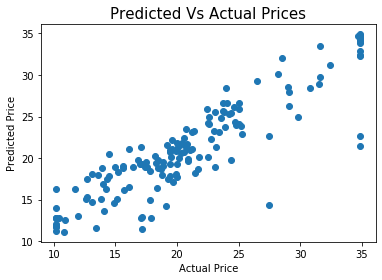

In [35]:
# visualizing the difference between the actual and predicted price 

plt.scatter(ytest, ytest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.show()

## Evaluation Comparison of all the 3 methods

**R-squared**

R-squared = (TSS-RSS)/TSS
- Explained variation/ Total variation
- 1 – Unexplained variation/ Total variation

A higher R-squared value indicates a higher amount of variability being explained by our model and vice-versa. 
- If we had a really low RSS value, it would mean that the regression line was very close to the actual points. 
- High RSS value, it would mean that the regression line was far away from the actual points.

In [36]:
models=pd.DataFrame({
    'Model':['Linear Regression', 'Random Forest', 'Support Vector Machine'],
    'R_squared Score':[lin_acc*100, rfr_acc*100,svm_acc*100]
})
models.sort_values(by='R_squared Score', ascending=False)

,Model,R_squared Score
1,Random Forest,80.353428
2,Support Vector Machine,78.995238
0,Linear Regression,69.975824


#### Observations:
- We can see that thr R_squared value for `Linera regression` is the lowest and the `Random Forest` is the highest.
- It means that **Linear Regression** gives us better results on test data, when compared to the other 2 models.